In [1]:
# Basic pandas and numpy
import pandas as pd
import numpy as np
 
# Basic visualization tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
# Pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

In [18]:
# Plotly
import plotly as py

In [2]:
who = pd.read_csv('../data/who.csv')

In [3]:
who.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# Change col names:
# to lower case, snake case, strip spaces
new_col_names = [i.strip().lower().replace(' ', '_').replace('-','_').replace('/','_') for i in list(who.columns)]
# There's an issue with 'thinness__1_19_years' (two spaces --> I change it manually)
new_col_names = ['thinness_1_19_years' if x=='thinness__1_19_years' else x for x in new_col_names]
print(new_col_names)

['country', 'year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv_aids', 'gdp', 'population', 'thinness_1_19_years', 'thinness_5_9_years', 'income_composition_of_resources', 'schooling']


In [5]:
who.columns = new_col_names

In [6]:
who.shape

(2938, 22)

In [7]:
who.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
country                            2938 non-null object
year                               2938 non-null int64
status                             2938 non-null object
life_expectancy                    2928 non-null float64
adult_mortality                    2928 non-null float64
infant_deaths                      2938 non-null int64
alcohol                            2744 non-null float64
percentage_expenditure             2938 non-null float64
hepatitis_b                        2385 non-null float64
measles                            2938 non-null int64
bmi                                2904 non-null float64
under_five_deaths                  2938 non-null int64
polio                              2919 non-null float64
total_expenditure                  2712 non-null float64
diphtheria                         2919 non-null float64
hiv_aids                           2938 non-null

In [8]:
# Although it does not seem to be a lot of NaN values, I explore for the percentage of them in each of the columns:
print('Columns with NaN values:')
for i in list(who.columns):
    perc = (1-(who[i].count()/len(who))).round(2)
    if perc > 0:
        print('Percentage null in {}: {}'.format(i,perc))

Columns with NaN values:
Percentage null in alcohol: 0.07
Percentage null in hepatitis_b: 0.19
Percentage null in bmi: 0.01
Percentage null in polio: 0.01
Percentage null in total_expenditure: 0.08
Percentage null in diphtheria: 0.01
Percentage null in gdp: 0.15
Percentage null in population: 0.22
Percentage null in thinness_1_19_years: 0.01
Percentage null in thinness_5_9_years: 0.01
Percentage null in income_composition_of_resources: 0.06
Percentage null in schooling: 0.06


In [9]:
# As we can see the columns with most missing values are population, gdp and hepatitis_b.
# We have Status as a marker of the economy, so it should't be a big issue.
# Initially, I'm not planning to analyze in terms of population, so it shouldn't really matter, I hope.
# Hep_b vaccination rates is kind of a boomer for me, but we'll see how I deal with it later.

In [10]:
# Let's do the same (check NaN) for rows, to check if the null values concentrate in specific Countries:

print('Rows with NaN values:')
nan_rows = pd.DataFrame()
for i in range(len(who)):
    row = who.iloc[i]
    perc = (1-(row.count()/(who.shape[1]))).round(2)
    if perc > 0.3:
        nan_rows = nan_rows.append(row)
        # print('Percentage null in {}: {}'.format(i,perc))
nan_rows

Rows with NaN values:


,adult_mortality,alcohol,bmi,country,diphtheria,gdp,hepatitis_b,hiv_aids,income_composition_of_resources,infant_deaths,life_expectancy,measles,percentage_expenditure,polio,population,schooling,status,thinness_1_19_years,thinness_5_9_years,total_expenditure,under_five_deaths,year
1715,NaN,0.01,NaN,Monaco,99.0,NaN,99.0,0.1,NaN,0.0,NaN,0.0,0.0,99.0,NaN,NaN,Developing,NaN,NaN,4.3,0.0,2013.0
2216,NaN,0.01,NaN,San Marino,69.0,NaN,69.0,0.1,NaN,0.0,NaN,0.0,0.0,69.0,NaN,15.1,Developing,NaN,NaN,6.5,0.0,2013.0
2414,359.0,NaN,NaN,South Sudan,NaN,1562.239346,NaN,4.0,0.0,27.0,55.0,0.0,0.0,NaN,167192.0,0.0,Developing,NaN,NaN,NaN,41.0,2010.0
2415,369.0,NaN,NaN,South Sudan,NaN,1264.789980,NaN,4.2,0.0,27.0,54.3,0.0,0.0,NaN,967667.0,0.0,Developing,NaN,NaN,NaN,42.0,2009.0
2416,377.0,NaN,NaN,South Sudan,NaN,1678.711862,NaN,4.2,0.0,27.0,53.6,0.0,0.0,NaN,9263136.0,0.0,Developing,NaN,NaN,NaN,42.0,2008.0
2417,381.0,NaN,NaN,South Sudan,NaN,NaN,NaN,4.2,0.0,27.0,53.1,0.0,0.0,NaN,88568.0,0.0,Developing,NaN,NaN,NaN,43.0,2007.0
2418,383.0,NaN,NaN,South Sudan,NaN,NaN,NaN,4.1,0.0,28.0,52.5,0.0,0.0,NaN,8468152.0,0.0,Developing,NaN,NaN,NaN,43.0,2006.0
2419,383.0,NaN,NaN,South Sudan,NaN,NaN,NaN,3.9,0.0,28.0,51.9,0.0,0.0,NaN,818877.0,0.0,Developing,NaN,NaN,NaN,44.0,2005.0
2420,383.0,NaN,NaN,South Sudan,NaN,NaN,NaN,3.8,0.0,29.0,51.4,0.0,0.0,NaN,7787655.0,0.0,Developing,NaN,NaN,NaN,45.0,2004.0
2421,383.0,NaN,NaN,South Sudan,NaN,NaN,NaN,3.5,0.0,29.0,58.0,0.0,0.0,NaN,751642.0,0.0,Developing,NaN,NaN,NaN,46.0,2003.0


In [11]:
"""
As we can see, apart from certain years of Monaco and San Marino, 
South Sudan seems to concentrate rows with very little information.
Let's see if all of South Sudan entries are the null ones or there are more rows of South Sudan"""
len(who.loc[who.country == 'South Sudan']) == len(nan_rows.loc[nan_rows.country == 'South Sudan'])

False

In [12]:
"""
For now, I won't be dropping those columns, as there is actually some information that can be used
('life expectancy', 'hiv', 'infant deaths', etc)
"""

"\nFor now, I won't be dropping those columns, as there is actually some information that can be used\n('life expectancy', 'hiv', 'infant deaths', etc)\n"

In [13]:
stats = who.describe()
stats

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [14]:
# IQR is added as a row:
stats.loc['IQR'] = stats.loc['75%'] - stats.loc['25%']
stats

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000
IQR,8.000000,12.600000,154.000000,22.000000,6.825000,436.848802,20.000000,360.250000,36.900000,28.000000,19.000000,3.23250,19.000000,0.700000,5446.870709,7.224566e+06,5.600000,5.700000,0.286000,4.200000


A priori tenemos datos bastante completos para todas las variables.
Donde más dispersión de datos (std y IQR más grandes), es en datos económicos (percentage_expenditure, gdp, population) y de mortalidad(adult_mortality, infant_deaths, under_five_deaths)

Llama la atención que haya países con una tasa de under_five_deaths de 0. Lo exploro:

In [19]:
who.loc[who.under_five_deaths == 0.00]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,47.7,0,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
65,Antigua and Barbuda,2014,Developing,76.2,131.0,0,8.56,2422.999774,99.0,0,47.0,0,96.0,5.54,99.0,0.2,12888.296670,NaN,3.3,3.3,0.782,13.9
66,Antigua and Barbuda,2013,Developing,76.1,133.0,0,8.58,1991.430372,99.0,0,46.4,0,98.0,5.33,99.0,0.2,12224.864160,NaN,3.3,3.3,0.781,13.9
67,Antigua and Barbuda,2012,Developing,75.9,134.0,0,8.18,2156.229842,98.0,0,45.7,0,97.0,5.39,98.0,0.2,12565.441970,NaN,3.3,3.3,0.778,13.8
68,Antigua and Barbuda,2011,Developing,75.7,136.0,0,7.84,1810.875316,99.0,0,45.1,0,99.0,5.65,99.0,0.1,11929.349910,NaN,3.3,3.3,0.782,14.1
69,Antigua and Barbuda,2010,Developing,75.6,138.0,0,7.84,1983.956937,98.0,0,44.4,0,99.0,5.63,98.0,0.1,12126.876140,NaN,3.3,3.3,0.783,14.1
70,Antigua and Barbuda,2009,Developing,75.4,14.0,0,7.82,149.358735,98.0,0,43.8,0,98.0,4.86,99.0,0.1,1312.466920,NaN,3.4,3.3,0.788,14.2
71,Antigua and Barbuda,2008,Developing,75.2,142.0,0,8.27,180.776270,98.0,0,43.2,0,99.0,4.69,99.0,0.1,1473.319230,NaN,3.4,3.3,0.786,14.4
72,Antigua and Barbuda,2007,Developing,75.0,144.0,0,8.64,257.966531,97.0,0,42.6,0,98.0,4.27,99.0,0.1,14252.294520,NaN,3.4,3.3,0.781,14.5


Probablemente sea por falta de registros, por lo que lo transformo en NaN

### Correlation matrix

In [15]:
cormat = who.corr()

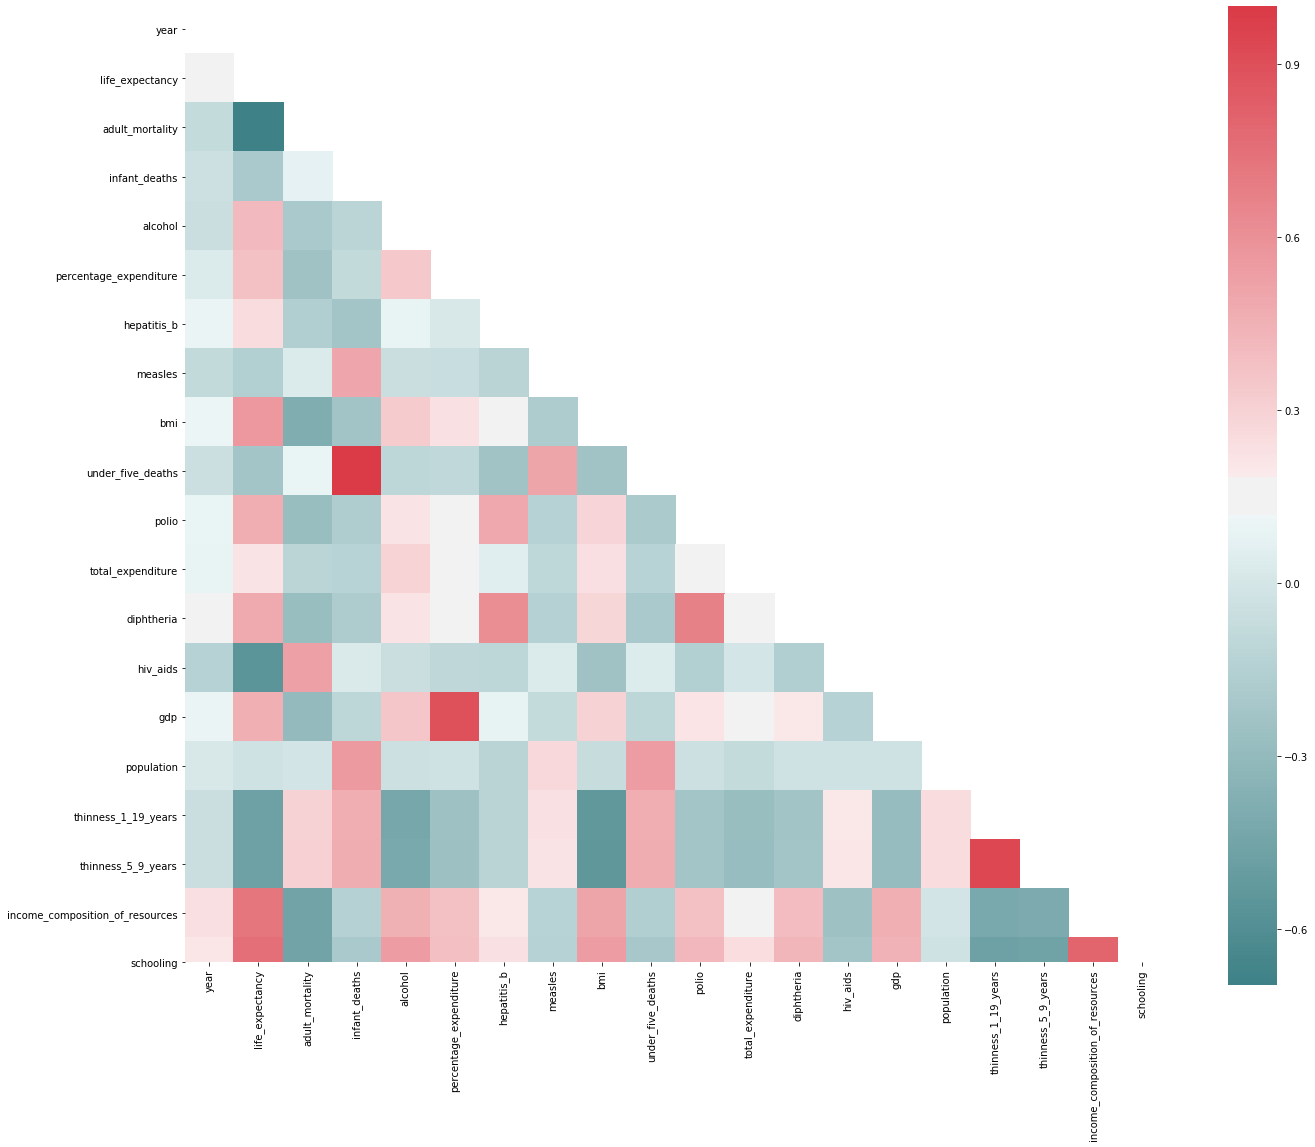

In [16]:
# Setting the mask for the upper half:
mask = np.zeros_like(cormat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Drawing the heatmap using the mask
f, ax = plt.subplots(figsize=(22, 18))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(cormat, cmap=cmap, square=True, mask=mask)

### Correlation matrix for Spain

In [17]:
spain = who.loc[who.Country == 'Spain']

AttributeError: 'DataFrame' object has no attribute 'Country'

In [ ]:
spain_corr = spain.corr()

In [ ]:
# Setting the mask for the upper half:
mask = np.zeros_like(spain_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [ ]:
#Drawing the heatmap using the mask
f, ax = plt.subplots(figsize=(22, 18))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(spain_corr, cmap=cmap, square=True, mask=mask)